# MATH&ML-13. Временные ряды. Часть II

## 1. Введение

✍ В предыдущем модуле мы уже начали знакомиться со специальными инструментами для работы с временными рядами. Теперь нас ждёт тяжёлая артиллерия: мы будем углублять знания и изучать более сложные и мощные модели.

В этом модуле вы:

- узнаете об основных статистических моделях: MA, ARMA, ARIMA, SARIMAX;

- изучите интерполяцию и сэмплирование временных рядов;

- познакомитесь с особенностями валидации временного ряда;

- научитесь строить и настраивать финансовые модели.

# 2. Проект модуля

✍ Каждому теоретическому юниту, где мы будем знакомиться с новыми инструментами для анализа временных рядов, будет сопутствовать соответствующий практический юнит. Практика предполагает поступательное решение двух задач: первая решается по скринкастам совместно с автором модуля, вторую вы решаете полностью самостоятельно.

**Вторая задача** — и есть ваш мини-проект этого модуля. Все задания для проекта необходимо выполнять в одном Jupyter-ноутбуке. Полученный в итоге ноутбук необходимо будет отправить на проверку ментору с помощью специальной формы в конце модуля.

Обратите внимание: от вас ожидается не только выполнение заданий в виде кода, но и комментарии и выводы по ним.

Будьте внимательны, чтобы не упустить ничего важного. Желаем вам удачи!

**Задача для самостоятельного проекта**

Представьте, что вы работаете в государственной компании, предоставляющей анализ экономической ситуации в мире по заказу государства.

Перед вами стоит задача проанализировать ВВП африканской страны Гана. Для этого вам предоставили показатели ВВП Ганы за 62 года. Вам предстоит исследовать временной ряд, изучить его свойства, построить модели и сделать выводы по результатам.

# 3. Статистические модели прогнозирования

✍ Разные статистические модели прогнозирования тесно связаны друг с другом: в целях улучшения результата более простые подходы расширялись и становились основой для более сложных. В итоге в статистике появилось несколько методов прогнозирования, отличающихся между собой деталями, которые мы рассмотрим в этом юните.

### СКОЛЬЗЯЩЕЕ СРЕДНЕЕ

В предыдущем модуле мы уже знакомились с экспоненциальным сглаживанием и получением с его помощью прогноза. Помимо простого экспоненциального сглаживания, есть также простое сглаживание, или **скользящее среднее**.

Для получения элементарного случая скользящего среднего проще всего взять среднее арифметическое двух последних наблюдений. Мы получим новый временной ряд, каждый член которого — среднее арифметическое двух соседних значений исходного ряда:

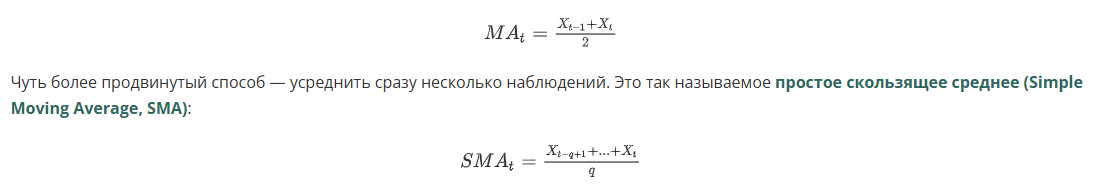

Таким образом, в скользящем среднем мы суммируем несколько последовательных точек временного ряда и делим эту сумму на количество самих точек, то есть считаем математическое усреднение за определённый период.

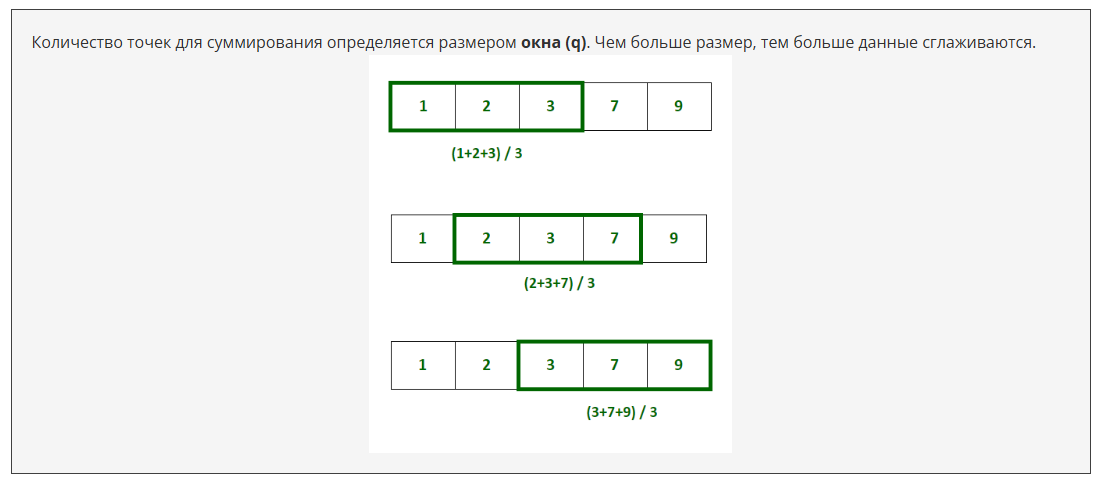

Для сглаживания мы будем использовать встроенный метод pandas.Series.rolling() — он принимает на вход параметр window и ожидает после себя агрегирующую функцию для сглаживания (обычно используется среднее). Из преимуществ этого метода можно отметить простоту реализации и интерпретации, из недостатков — чувствительность.

Посмотрим на некоторый временной ряд и результаты применения сглаживания к нему:

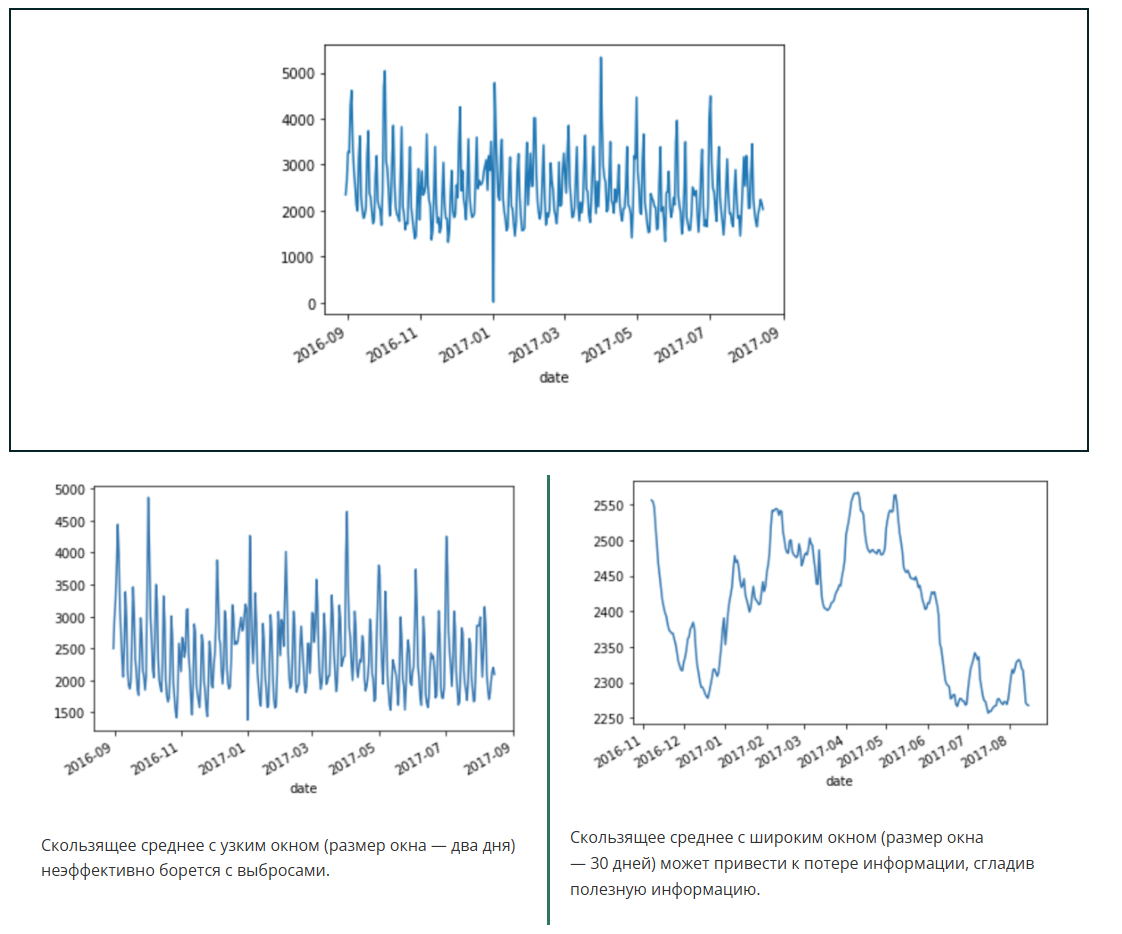

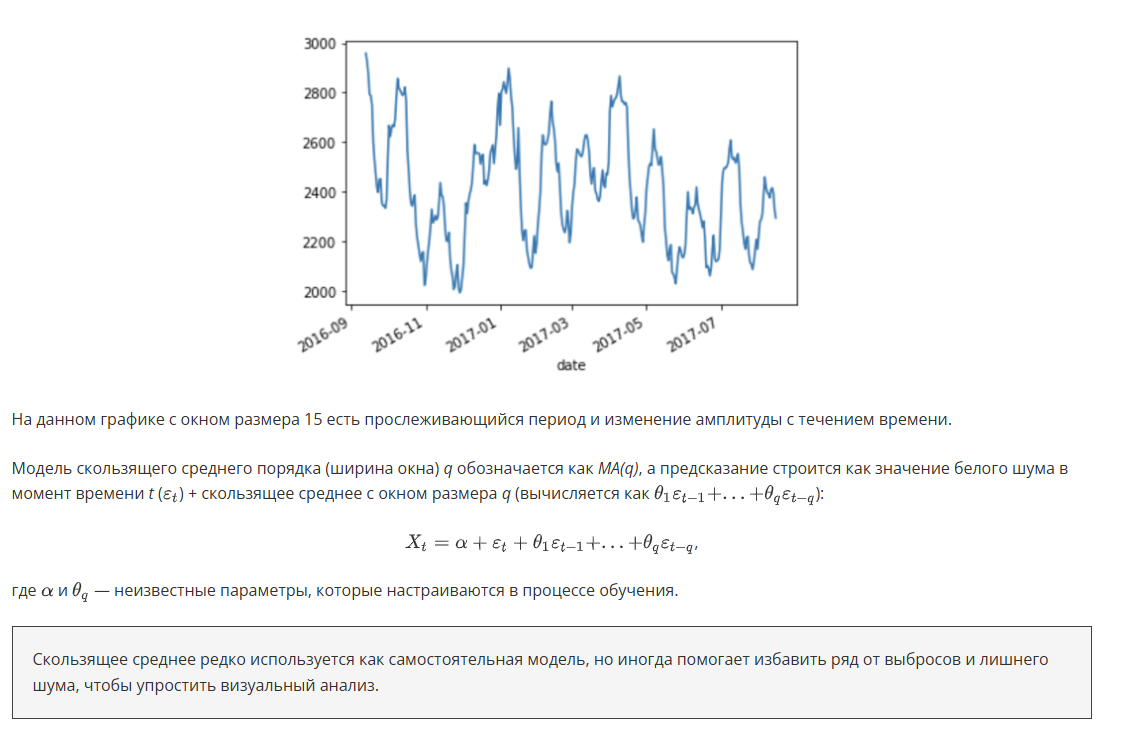

### ARMA и ARIMA

Что получится, если объединить некоторые из изученных нами методов? Уже есть предположения, что такое ARMA?

Если вы внимательно следили за ходом событий, то смогли догадаться, что **ARMA** — это авторегрессионное скользящее среднее, или модель авторегрессии-скользящего среднего. В ней "p" **авторегрессионных слагаемых** и "q" **слагаемых скользящего среднего шумовой компоненты**:

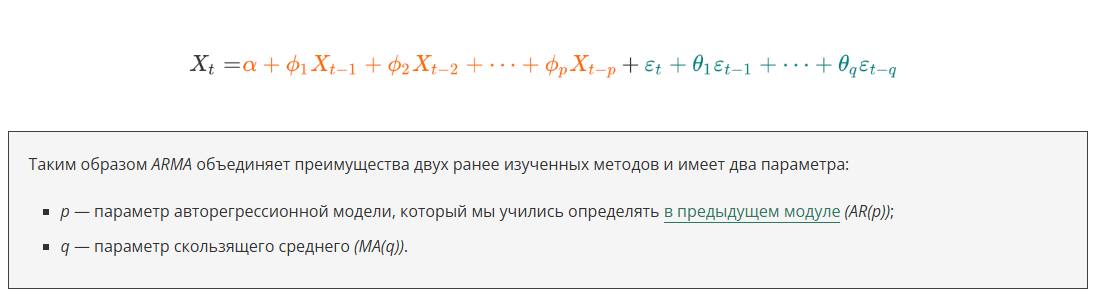

Параметр p мы определяли по графику частичной автокорреляции. Параметр q для скользящего среднего определяют так же, но по коррелограмме (графику автокорреляции).

«Было бы здорово применить всё это и для временных рядов, которые не являются стационарными», — подумали Дж. Бокс и Г. Дженкинс и расширили модель ARMA до ARIMA.

**ARIMA** расшифровывается как Autoregressive Integrated Moving Average и включает в себя ещё один параметр (d), который означает, что дифференцирование временного ряда порядка d приводит ряд к стационарности и будет подчиняться модели ARMA.

d — это тот самый порядок дифференцирования из предыдущего модуля, который приводил нестационарный ряд к стационарности. Это значит, что даже если наш ряд нестационарный, мы можем сделать его стационарным путём взятия разностей. Запомнив получившееся количество дифференцирований, можно смело применять к нему ARIMA.

И ARMA, и ARIMA реализованы на Python в классе ARIMA из statsmodels. Данному классу необходимо передать в качестве параметров временной ряд и порядок order (ARIMA(dta, order=(2, 0, 0))). Для параметра order нужно указать p, d и q (именно в таком порядке), причём для получения ARMA необходимо указать d=0.